In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

test = pd.read_csv('datasets/test.csv')
train = pd.read_csv('datasets/train.csv')

test['source'] = 'test'
train['source'] = 'train'

df = pd.concat([train, test]).reset_index()
df.drop(columns='index', inplace=True)

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [3]:
cols = df.columns.str.lower()
df.columns = cols

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1309 non-null   int64  
 1   survived     891 non-null    float64
 2   pclass       1309 non-null   int64  
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   int64  
 7   parch        1309 non-null   int64  
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
 12  source       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [5]:
df.isnull().sum() / df.shape[0] * 100

passengerid     0.000000
survived       31.932773
pclass          0.000000
name            0.000000
sex             0.000000
age            20.091673
sibsp           0.000000
parch           0.000000
ticket          0.000000
fare            0.076394
cabin          77.463713
embarked        0.152788
source          0.000000
dtype: float64

Age - aqui eu vou precisar realizar um tratamento. Essa variável pode ter uma boa importância. 

Cabin - não vejo muita utilidade em utilizar essa variável. Posso deixar ela pra depois

# <font color = 'gold'> Data Exploration </font>

In [6]:
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,train
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,train
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,train
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,train


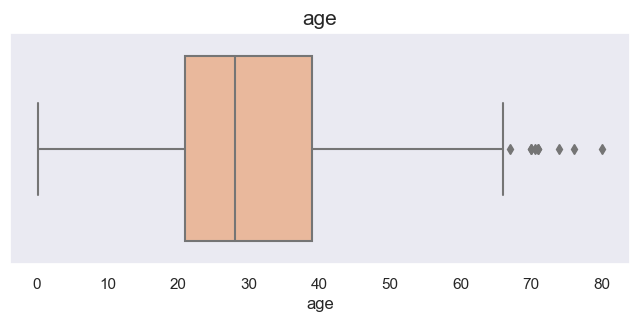

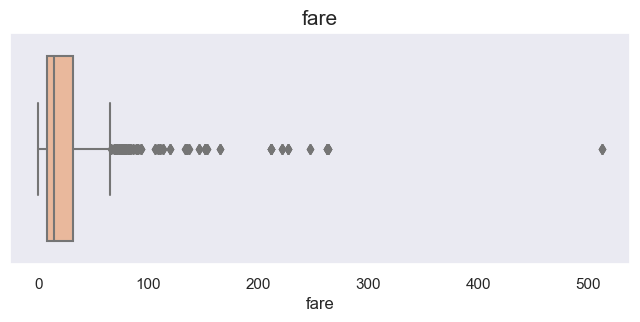

In [8]:
sns.set_theme(style = 'dark', palette = 'rocket_r')
analysis_vars = ['age', 'fare']

for col in analysis_vars:
    fig = plt.figure(figsize = (8, 3))
    sns.boxplot(x = df[col])
    title = col
    plt.title(col, fontsize = 15)
    plt.show()

<Figure size 300x200 with 0 Axes>

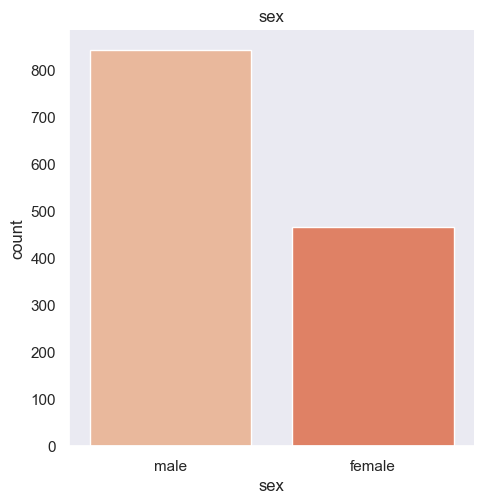

<Figure size 300x200 with 0 Axes>

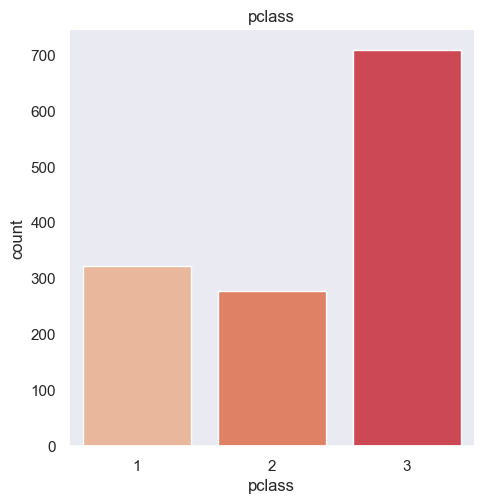

<Figure size 300x200 with 0 Axes>

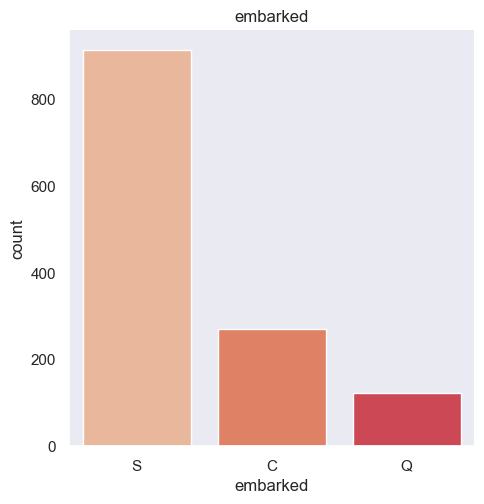

<Figure size 300x200 with 0 Axes>

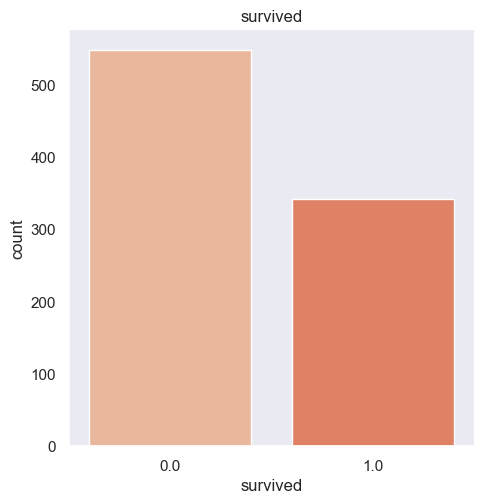

In [9]:
analysis_vars_cat = ['sex', 'pclass', 'embarked', 'survived']

for col in analysis_vars_cat:
    plt.figure(figsize = (3, 2))
    sns.catplot(data = df, x = col, kind = 'count')
    plt.title(col)
    plt.show()

In [10]:
df.loc[df.source == 'train'].groupby('survived').survived.count() / df.loc[df.source == 'train'].shape[0]

survived
0.0    0.616162
1.0    0.383838
Name: survived, dtype: float64

In [11]:
df.groupby('pclass').fare.mean()

pclass
1    87.508992
2    21.179196
3    13.302889
Name: fare, dtype: float64

In [12]:
df.groupby('embarked').fare.mean()

embarked
C    62.336267
Q    12.409012
S    27.418824
Name: fare, dtype: float64

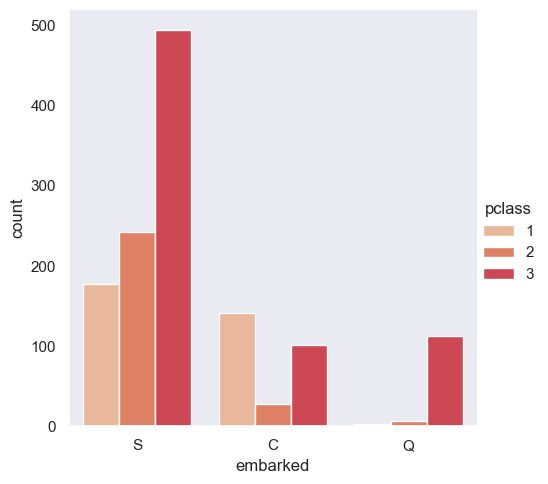

In [13]:
sns.catplot(data = df, x = 'embarked', hue = 'pclass', kind = 'count')

# <font color = 'gold'> Data Cleaning </font> 

In [14]:
df.loc[df.age.isnull()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,source
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,train
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,train
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,train
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,train
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,test
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,test
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test


In [15]:
df.groupby('sex').age.mean()

sex
female    28.687088
male      30.585228
Name: age, dtype: float64

In [16]:
mean_age_by_sex_and_survived = round(df.groupby(['sex', 'survived']).age.mean().reset_index().age.mean())

In [17]:
df.loc[df.age.isnull(), 'age'] = mean_age_by_sex_and_survived

In [18]:
df = df.loc[df.age >= 1]

In [19]:
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,1297.000000,884.000000,1297.000000,1297.000000,1297.000000,1297.000000,1296.000000
mean,653.546646,0.378959,2.292984,29.769854,0.495759,0.375482,33.336268
std,377.834129,0.485403,0.839177,12.661901,1.043878,0.862517,51.870932
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,327.000000,0.000000,2.000000,23.000000,0.000000,0.000000,7.895800
50%,653.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,980.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


# <font color = 'gold'> Feature Engineering </font>

In [20]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [21]:
# AGE RANGE
bins = [0, 12, 20, 35, 59, df.age.max()]
labels = ['kid', 'teen', 'young', 'adult','old']

age_bins = pd.cut(x = df.age, bins = bins, labels = labels)
df['age_range'] = age_bins

/var/folders/mq/g6k1b1h96tsb47xpdljnctsc0000gp/T/ipykernel_3918/143087643.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_range'] = age_bins


In [22]:
# FARE RANGE
q_25 = df.fare.quantile(0.25)
q_50 = df.fare.quantile(0.5)
max_value = df.fare.max()

bins = [0, q_25, q_50, max_value]
labels = ['cheap', 'moderate', 'expensive']

fare_bins = pd.cut(x = df.fare, bins = bins, labels = labels)

df['fare_range'] = fare_bins

/var/folders/mq/g6k1b1h96tsb47xpdljnctsc0000gp/T/ipykernel_3918/4023064335.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fare_range'] = fare_bins


In [23]:
# TOTAL FAMILY NUMBER
df['total_family'] = df.sibsp + df.parch

/var/folders/mq/g6k1b1h96tsb47xpdljnctsc0000gp/T/ipykernel_3918/2881920387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_family'] = df.sibsp + df.parch


# <font color = 'gold'> Data Exploration - Part 2 <font>
### Multivariable Analysis

In [24]:
df_train = df.loc[df.source == 'train']

df_train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,source,age_range,fare_range,total_family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,young,cheap,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,adult,expensive,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,young,moderate,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,young,expensive,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,young,moderate,0


In [25]:
#numeric_variables = [x for x in df_train.columns if x.dtypes]
#[col for col in df.columns if df[col].dtypes != 'object']
df_train.corr()['survived']

passengerid    -0.009402
survived        1.000000
pclass         -0.341319
age            -0.043967
sibsp          -0.040023
parch           0.071266
fare            0.258852
total_family    0.008128
Name: survived, dtype: float64

<AxesSubplot:>

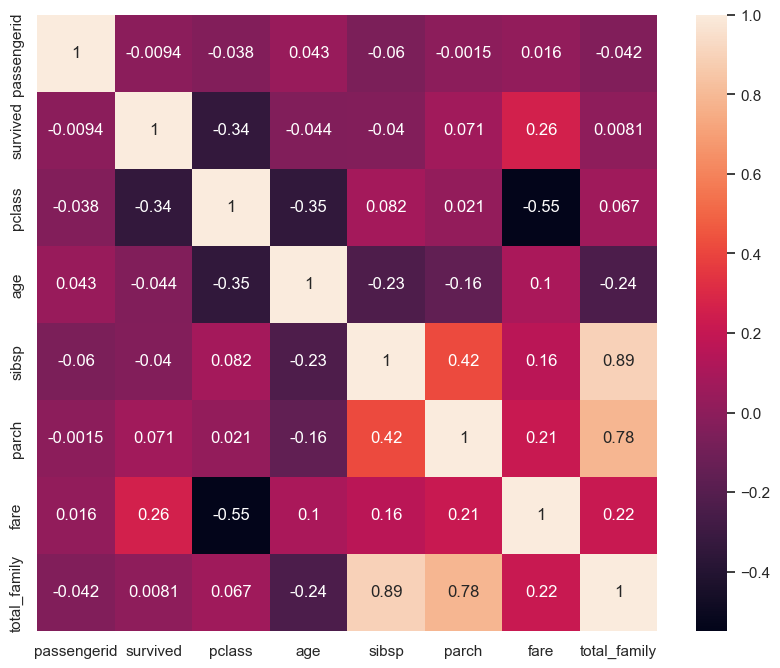

In [26]:
plt.figure(figsize = (10, 8))
sns.heatmap(data = df_train.corr(), annot = True)

In [27]:
def percent_analysis(df, column, column_extra = 'survived'):
    cols = [column, column_extra]
    map = df.groupby(cols).passengerid.nunique().reset_index()
    map['percent'] = map.passengerid / map.groupby(column).passengerid.transform('sum') * 100

    return map


def data_viz_barchart(df, y, var, axes, row, column, title):
    chart_percent = sns.barplot(data = df,
                                x = var,
                                y = y,
                                hue = 'survived',
                                ax = axes[row, column])
    title = title + var
    axes[row, column].set_title(title, fontsize = 15)

    for p in chart_percent.patches:
        chart_percent.annotate(format(p.get_height(), '.0f'),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha = 'center', va = 'center',
                            xytext = (0, 9),
                            textcoords = 'offset points')

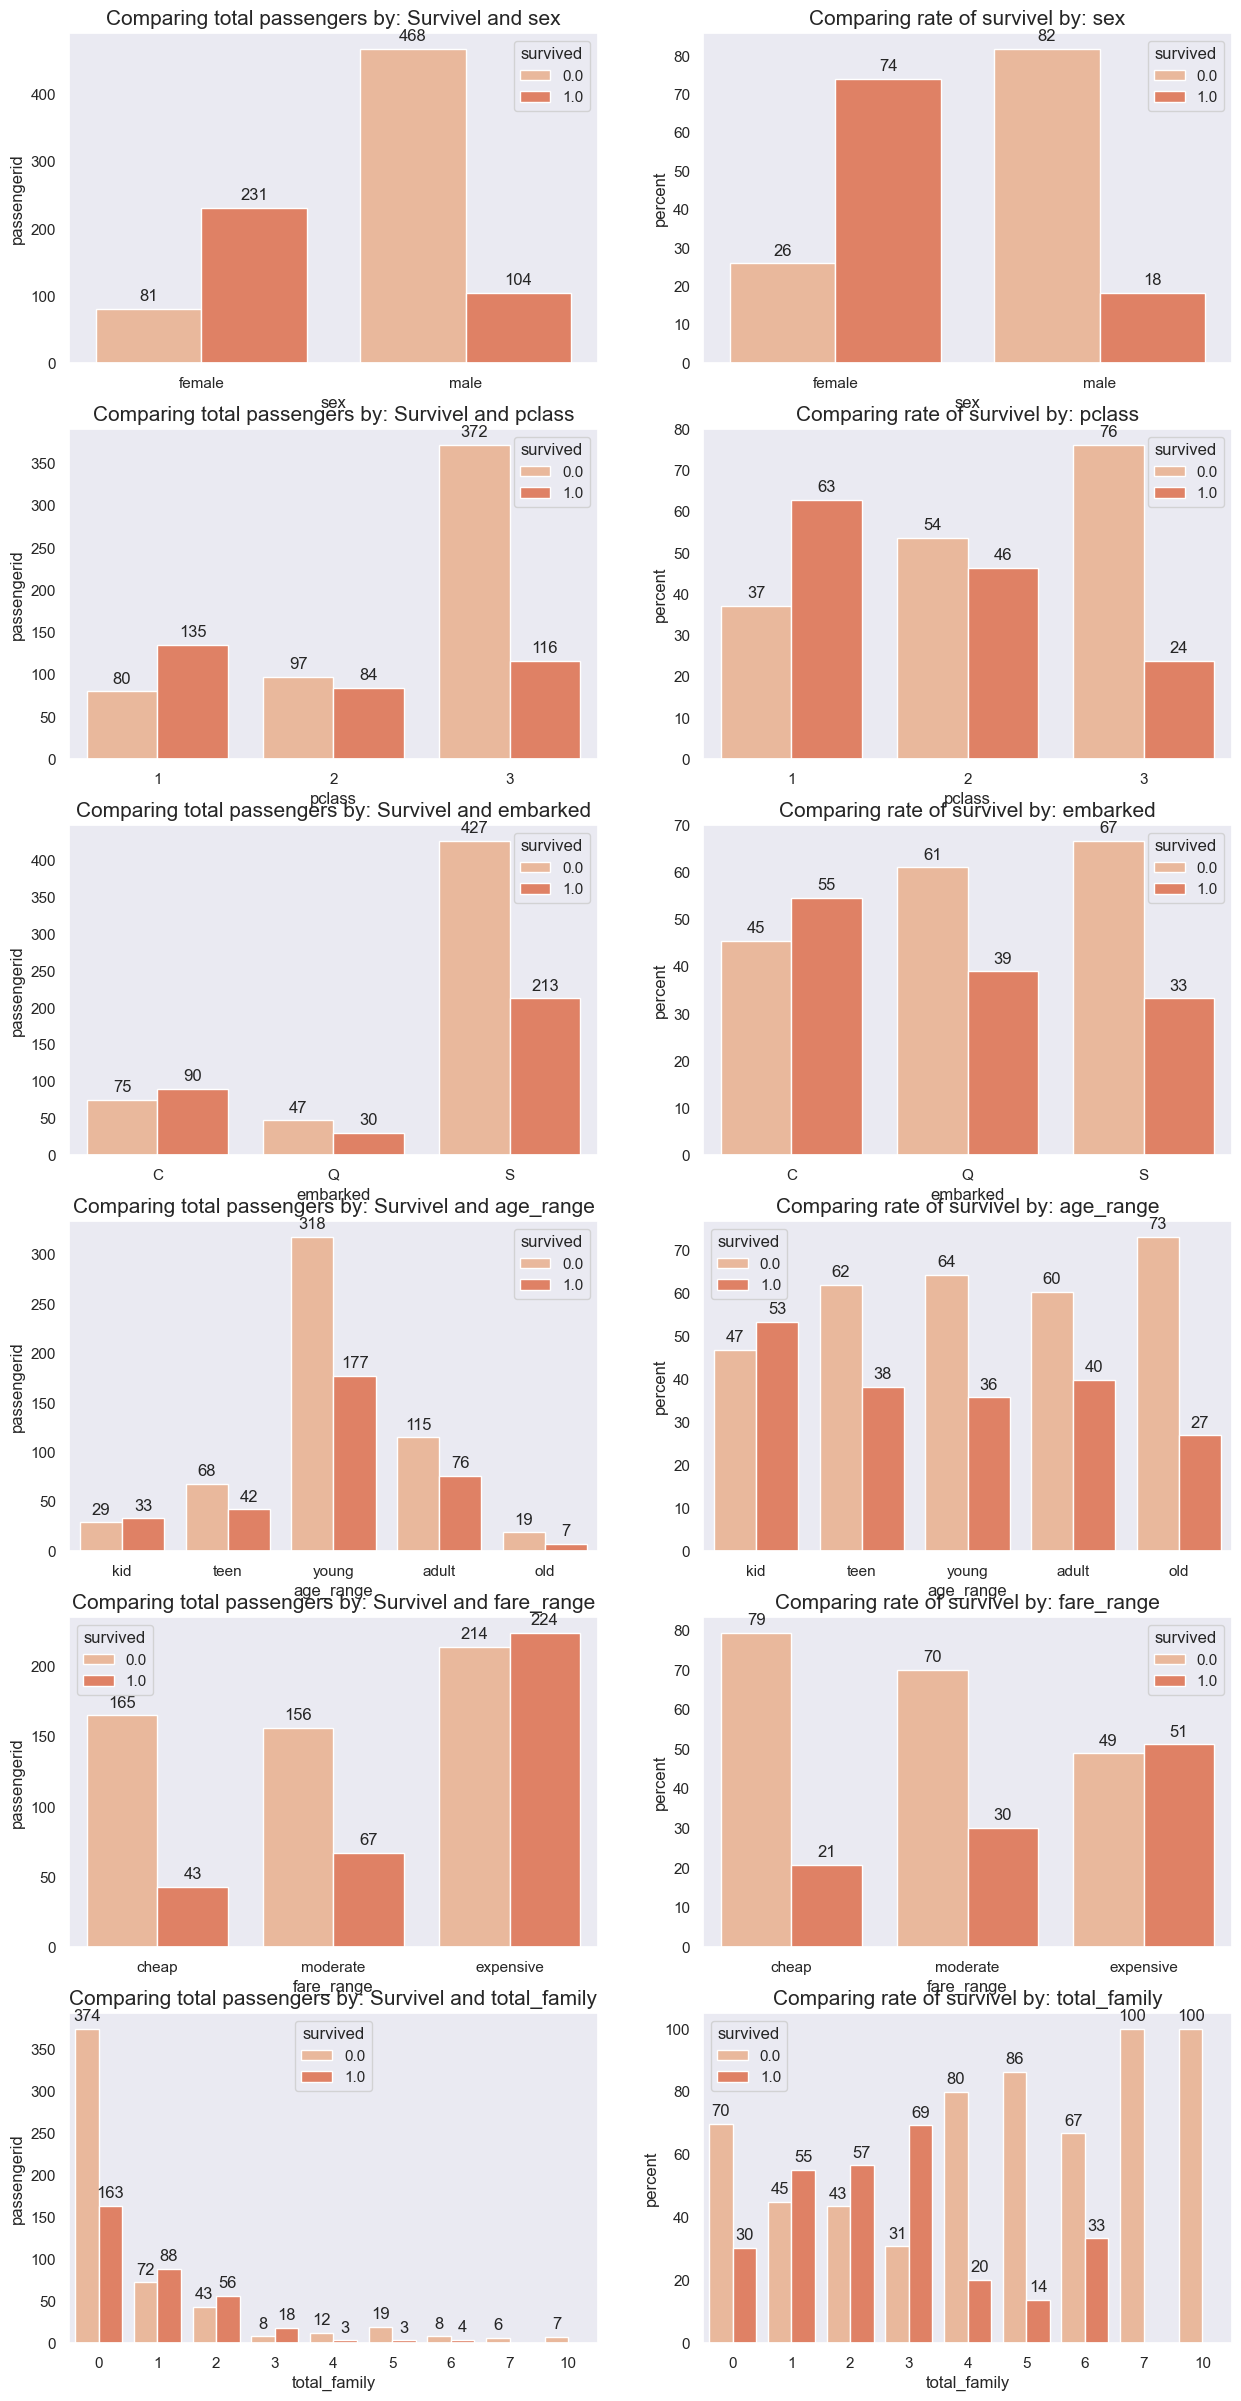

In [28]:
analysis_vars_cat = ['sex','pclass', 'embarked', 'age_range', 'fare_range', 'total_family']

fig, ax = plt.subplots(6, 2, figsize = (15, 30))
title_total = 'Comparing total passengers by: Survivel and '
title_percent = 'Comparing rate of survivel by: '

for row, var in enumerate(analysis_vars_cat):
    # total charts
    gb = df_train.groupby([var, 'survived']).passengerid.count().reset_index()
    data_viz_barchart(df = gb, y = 'passengerid', var = var, axes = ax, row = row, column = 0, title = title_total)

    # percent charts
    df_viz = percent_analysis(df_train, column = var)
    data_viz_barchart(df = df_viz, y = 'percent', var = var, axes = ax, row = row, column = 1, title = title_percent)

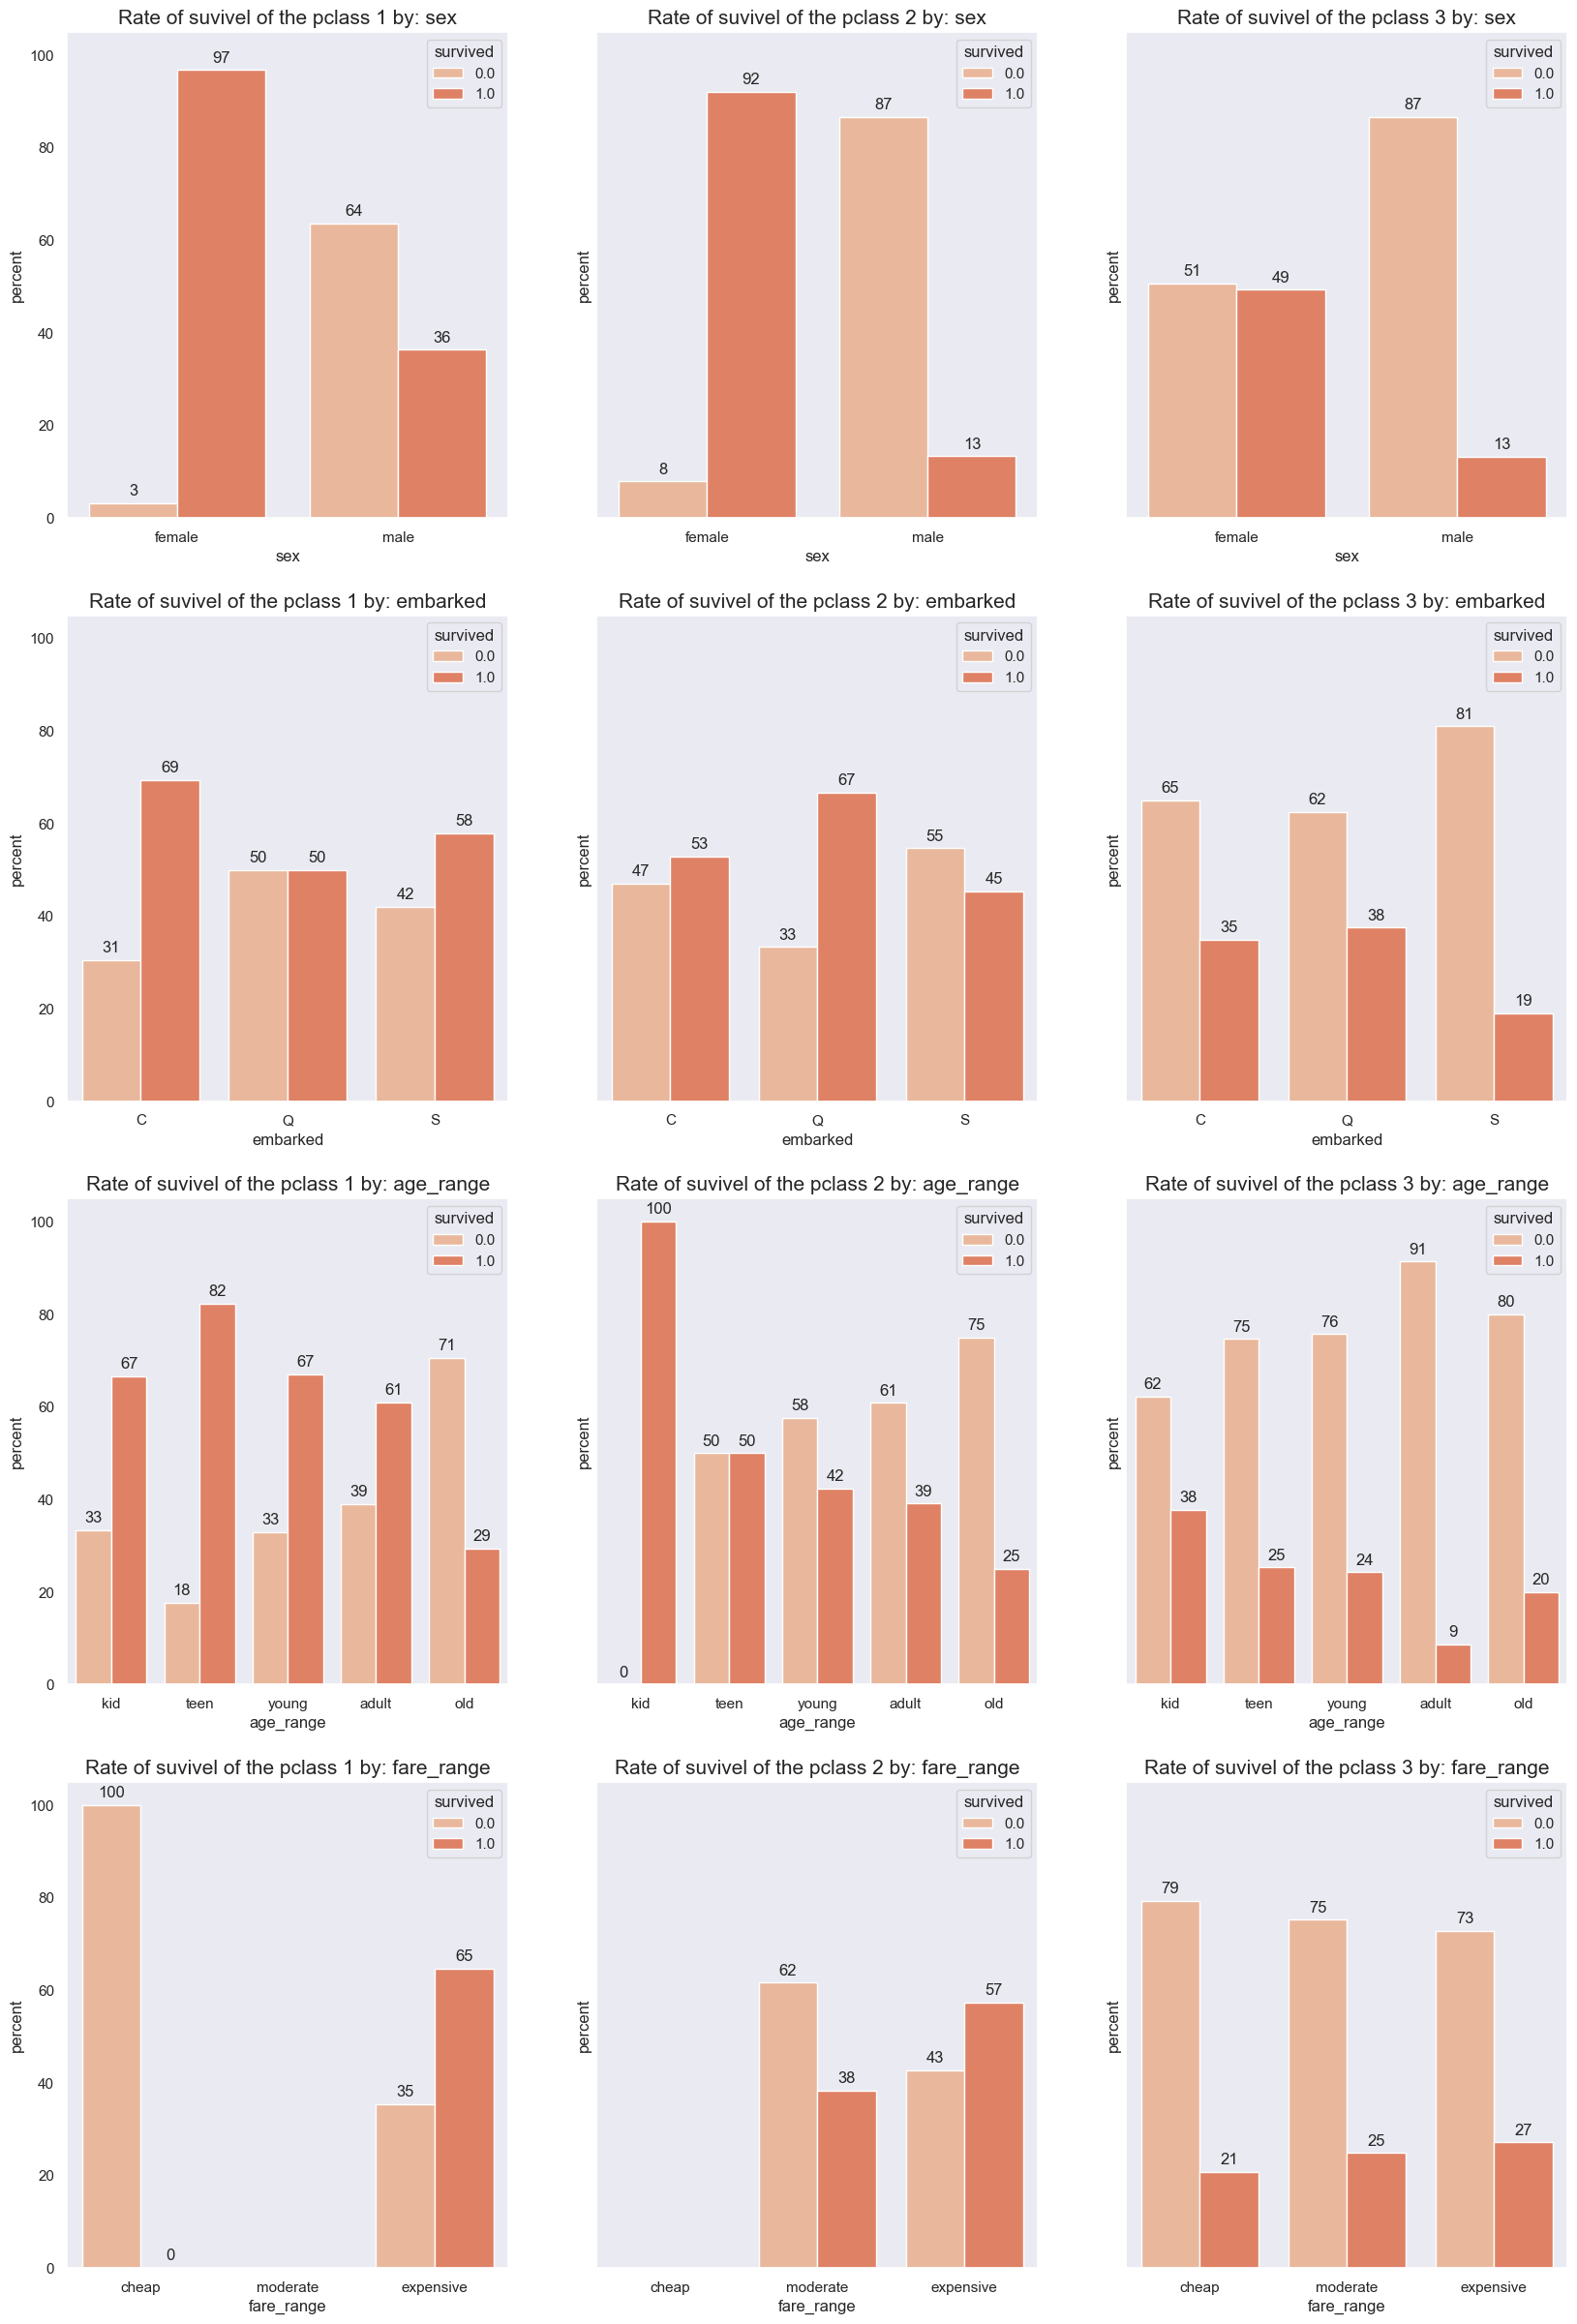

In [29]:
# analysing by percent rate

analysis_vars_cat = ['sex', 'embarked', 'age_range', 'fare_range']
fig, ax = plt.subplots(4, 3, figsize = (20, 30), sharey = True)

for pclass in range(3):
    for row, var in enumerate(analysis_vars_cat):
        # percent charts
        title = 'Rate of suvivel of the pclass ' + str(pclass + 1) + ' by: '
        df_viz = percent_analysis(df_train.loc[df_train.pclass == (pclass + 1)], column = var)
        data_viz_barchart(df = df_viz, y = 'percent', var = var, axes = ax, row = row, column = pclass, title = title)

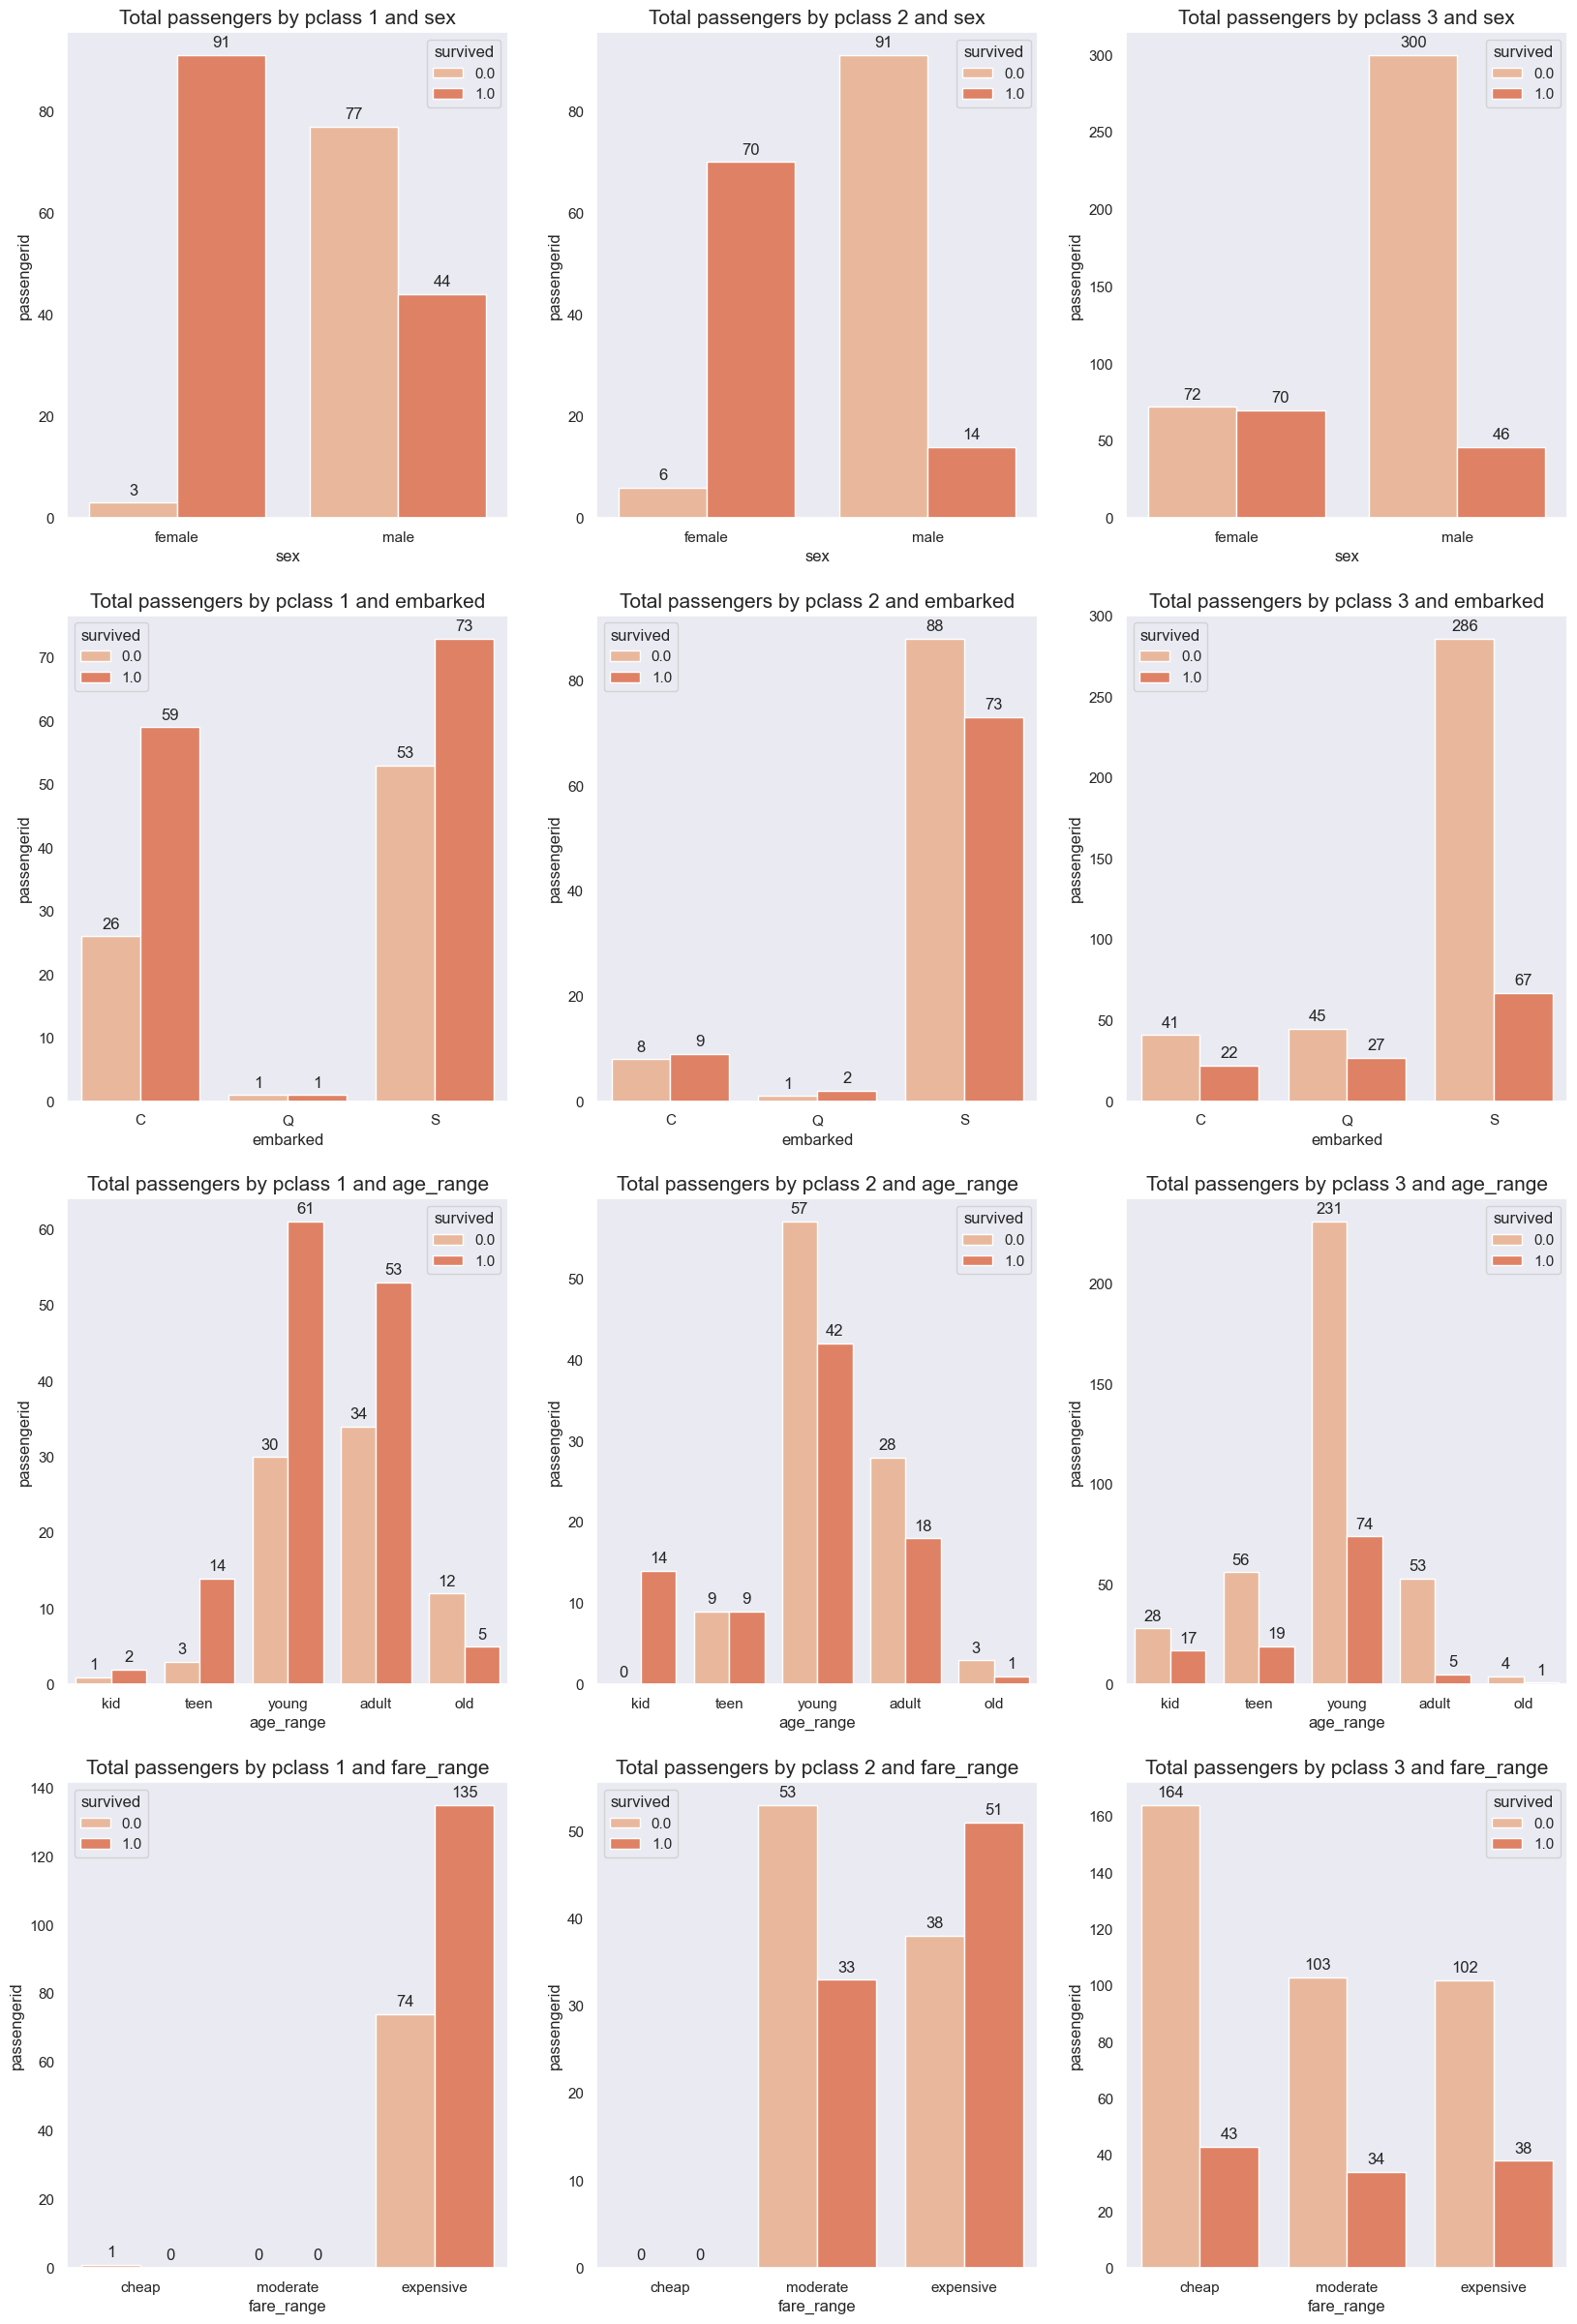

In [30]:
# analysing by absolute numbers

analysis_vars_cat = ['sex', 'embarked', 'age_range', 'fare_range']
fig, ax = plt.subplots(4, 3, figsize = (20, 30))

for pclass in range(3):
    for row, var in enumerate(analysis_vars_cat):
        # percent charts
        title = 'Total passengers by pclass ' + str(pclass + 1) + ' and '
        gb = df_train.loc[df_train.pclass == pclass + 1].groupby([var, 'survived']).passengerid.count().reset_index()
        data_viz_barchart(df = gb, y = 'passengerid', var = var, axes = ax, row = row, column = pclass, title = title)

# <font color = 'gold'> Modeling </font>

In [31]:
df_train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,source,age_range,fare_range,total_family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,young,cheap,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,adult,expensive,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,young,moderate,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,young,expensive,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,young,moderate,0


Aplicando information value para calcular o poder de separação que as variáveis categóricas possuem sobre a variável Survived

In [32]:
# Information Value (IV)

def iv(df_0, vars):
    df_all = []
    for var in vars:
        df_1 = df_0.groupby(var).agg(freq = ('passengerid', 'count')).reset_index()
        df_1['freq_rel'] = df_1.freq / df_1.freq.sum()

        df_2 = df_0.pivot_table(index = var,
                    columns = 'survived',
                    values = 'passengerid',
                    aggfunc = 'count').reset_index()

        df = df_1.merge(right=df_2, how = 'inner', on = var)
        df.insert(loc = 0, column = 'variable_name', value = var)
        
        # Renaming columns
        cols_to_rename = pd.Series(df.columns)
        cols_renamed = cols_to_rename.replace(to_replace = [var ,0, 1], value = ['categories', 'non_event', 'event'])
        df.columns = cols_renamed
        

        df['percent_non_event'] = df.non_event / df.non_event.sum()
        df['percent_event'] = df.event / df.event.sum()

        df['event_rate'] = df.event / df.freq
        df['odds'] = df.percent_event / df.percent_non_event

        df['ln_log'] = np.log(df.odds)

        df['iv'] = (df.percent_event - df.percent_non_event) * df.ln_log
        
        df_all.append(df)

    df = pd.concat(df_all)
    
    return df

In [33]:
categorical_variables = 'pclass,sex,embarked,age_range,fare_range'.split(',')
df_iv = iv(df_train, categorical_variables)
df_iv

,variable_name,categories,freq,freq_rel,non_event,event,percent_non_event,percent_event,event_rate,odds,ln_log,iv
0,pclass,1,215,0.243213,80,135,0.145719,0.402985,0.627907,2.765485,1.017216,0.261695
1,pclass,2,181,0.204751,97,84,0.176685,0.250746,0.464088,1.419172,0.350074,0.025927
2,pclass,3,488,0.552036,372,116,0.677596,0.346269,0.237705,0.511026,-0.671336,0.222432
0,sex,female,312,0.352941,81,231,0.147541,0.689552,0.740385,4.673632,1.541936,0.835747
1,sex,male,572,0.647059,468,104,0.852459,0.310448,0.181818,0.364179,-1.010109,0.547491
0,embarked,C,165,0.187075,75,90,0.136612,0.270270,0.545455,1.978378,0.682278,0.091192
1,embarked,Q,77,0.087302,47,30,0.085610,0.090090,0.389610,1.052329,0.051006,0.000229
2,embarked,S,640,0.725624,427,213,0.777778,0.639640,0.332813,0.822394,-0.195536,0.027011
0,age_range,kid,62,0.070136,29,33,0.052823,0.098507,0.532258,1.864848,0.623180,0.028469
1,age_range,teen,110,0.124434,68,42,0.123862,0.125373,0.381818,1.012204,0.012130,0.000018


In [34]:
df_iv.groupby('variable_name').iv.sum().reset_index().sort_values(by = 'iv', ascending = False)

,variable_name,iv
4,sex,1.383238
3,pclass,0.510053
2,fare_range,0.330871
1,embarked,0.118431
0,age_range,0.041472


In [118]:
def calc_probability_survivel(df_iv, sex, cost):
    sex_dic = {'M': 'male',
               'F': 'female'}
    sex = sex_dic[sex.upper()]
    
    if cost <= 2500:
        pclass = 3
    elif cost <= 10000:
        pclass = 2
    else:
        pclass = 1

    sex_prob = df_iv.loc[df_iv.categories == sex]['event_rate']
    
    pclass_prob = df_iv.loc


    #final_survivel_probability = sex_prob.values * fare_range_prob.values * pclass_prob.values
    return sex_prob[0]

In [119]:
calc_probability_survivel(df_iv, 'f', 10000)

0.7403846153846154

In [115]:
total_mulheres = df_train.loc[df_train.sex == 'female'].shape[0]
total_mulheres_sobreviveram = df_train.loc[(df_train.sex == 'female') & (df_train.survived == 1)].shape[0]

total_mulheres_sobreviveram / total_mulheres

0.7403846153846154

In [112]:
# Dados fictícios para exemplo
data = {
    'Sex': ['male', 'female', 'male', 'female', 'female', 'male'],
    'Pclass': [1, 1, 2, 1, 2, 3],
    'Survived': [0, 1, 1, 1, 0, 0]
}
df = pd.DataFrame(data)

# Calcular a probabilidade de uma mulher sobreviver
total_mulheres = len(df[df['Sex'] == 'female'])
sobreviveram_mulheres = len(df[(df['Sex'] == 'female') & (df['Survived'] == 1)])
probabilidade_mulher_sobreviver = sobreviveram_mulheres / total_mulheres

# Calcular a probabilidade de um passageiro estar na primeira classe
total_primeira_classe = len(df[df['Pclass'] == 1])
probabilidade_primeira_classe = total_primeira_classe / len(df)

# Calcular a probabilidade conjunta de uma mulher estar na primeira classe e sobreviver
total_mulheres_primeira_classe = len(df[(df['Sex'] == 'female') & (df['Pclass'] == 1)])
sobreviveram_mulheres_primeira_classe = len(df[(df['Sex'] == 'female') & (df['Pclass'] == 1) & (df['Survived'] == 1)])
probabilidade_conjunta = sobreviveram_mulheres_primeira_classe / total_mulheres_primeira_classe

print(f'Probabilidade de uma mulher sobreviver: {probabilidade_mulher_sobreviver:.2f}')
print(f'Probabilidade de estar na primeira classe: {probabilidade_primeira_classe:.2f}')
print(f'Probabilidade conjunta de uma mulher estar na primeira classe e sobreviver: {probabilidade_conjunta:.2f}')

Probabilidade de uma mulher sobreviver: 0.67
Probabilidade de estar na primeira classe: 0.50
Probabilidade conjunta de uma mulher estar na primeira classe e sobreviver: 1.00
